In [1]:
# project: p13
# submitter: backliwal@wisc.edu
# partner: none

In [2]:
import requests
import os
from pandas import DataFrame, Series
import pandas as pd
import math
from bs4 import BeautifulSoup
import json
import matplotlib
from matplotlib import pyplot as plt

In [3]:
def download(filename, url):
    # We do not download again if the file already exists
    if os.path.exists(filename):
        return (str(filename) + " already exists!")
    
    get = requests.get(url)
    get.raise_for_status()
    data = get.text
    f = open(filename, "w", encoding="utf-8")
    f.write(data)
    f.close()

    # TODO: Write the code to download the file from URL
    # and save it in `filename`

    return (str(filename) + " created!")

In [4]:
download("countries.json", "https://raw.githubusercontent.com/msyamkumar/cs220-f20-projects/master/p13/countries.json")

'countries.json already exists!'

In [5]:
countries = pd.read_json('countries.json')
countries.head()

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA


In [6]:
import sqlite3
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)

# remember to do conn.close() at the end of your notebook

In [7]:
def qry(QUERRY):
    return pd.read_sql(QUERRY, conn)

In [8]:
#Q1: In our dataset, how many countries are in each region?
regions_df = qry("""
SELECT region AS 'region', COUNT(region) AS 'number of countries'
FROM countries
GROUP BY region
ORDER BY COUNT(region) DESC, region
""")
regions_df

,region,number of countries
0,SUB-SAHARAN AFRICA,42
1,LATIN AMER. & CARIB,33
2,WESTERN EUROPE,22
3,ASIA (EX. NEAR EAST),21
4,NEAR EAST,13
5,C.W. OF IND. STATES,12
6,OCEANIA,12
7,EASTERN EUROPE,8
8,NORTHERN AFRICA,5
9,BALTICS,3


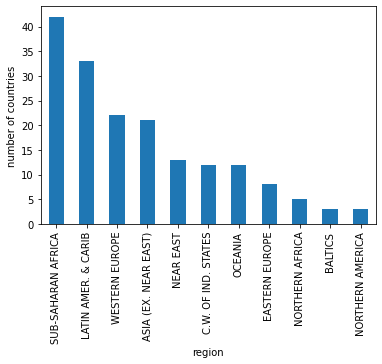

In [9]:
#Q2: How many countries are in each region? (answer with a plot)
region_count_plot = regions_df.plot.bar()
region_count_plot.set_xlabel("region")
region_count_plot.set_ylabel("number of countries")
region_count_plot.set_xticklabels(list(regions_df.region))
region_count_plot.get_legend().remove()

In [10]:
#Q3: What is the total area of each region?
region_area_df = qry("""
SELECT region AS 'region', SUM(area) AS 'total area'
FROM countries
GROUP BY region
ORDER BY SUM(area) DESC, region
""")
region_area_df

,region,total area
0,ASIA (EX. NEAR EAST),22177295
1,C.W. OF IND. STATES,22100843
2,LATIN AMER. & CARIB,20426877
3,NORTHERN AMERICA,19616143
4,SUB-SAHARAN AFRICA,19446660
5,OCEANIA,8488612
6,NORTHERN AFRICA,5752890
7,NEAR EAST,4340116
8,WESTERN EUROPE,3707838
9,EASTERN EUROPE,938554


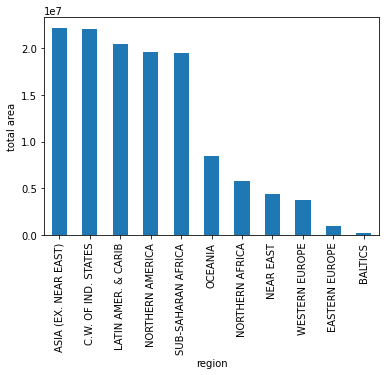

In [11]:
#Q4: What is the total area of each region? (answer with a plot)
region_area_plot = region_area_df.plot.bar()
region_area_plot.set_xlabel("region")
region_area_plot.set_ylabel("total area")
region_area_plot.set_xticklabels(list(region_area_df.region))
region_area_plot.get_legend().remove()

In [12]:
#Q5: What is the area of each country in the Near East region?
near_east_area = qry("""
SELECT country AS 'country', area AS 'area'
FROM countries
WHERE region='NEAR EAST'
GROUP BY country
ORDER BY area DESC, region
""")
near_east_area

,country,area
0,Saudi Arabia,1960582
1,Turkey,780580
2,Yemen,527970
3,Iraq,437072
4,Oman,212460
5,Syria,185180
6,Jordan,92300
7,United Arab Emirates,82880
8,Israel,20770
9,Kuwait,17820


In [13]:
#Q6: What are the top 12 countries that have the largest real GDP?
real_gdb = qry("""
SELECT country, (population*"gdp-per-capita")/1e9 AS 'Real GDP(billion)'
FROM countries
GROUP BY country
ORDER BY (population*"gdp-per-capita")/1e9 DESC, country
""")
top_real_gdb = real_gdb[:12]
top_real_gdb

,country,Real GDP(billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


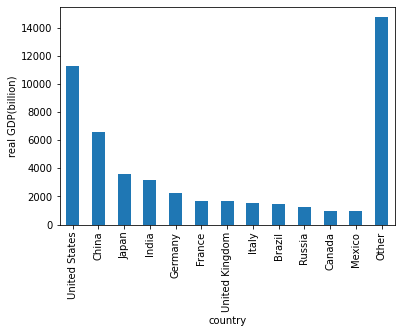

In [14]:
#Q7: What are the top 12 countries that have the largest real GDP? (answer with a plot)
top_gdp_bar_plot = top_real_gdb.copy()
other_val = real_gdb.iloc[12:]["Real GDP(billion)"].sum()
top_gdp_bar_plot.loc[12, "Real GDP(billion)"] = other_val
top_gdp_bar_plot.country.loc[12] = "Other"
gdb_plot = top_gdp_bar_plot.plot.bar()
gdb_plot.set_xlabel("country")
gdb_plot.set_ylabel("real GDP(billion)")
gdb_plot.set_xticklabels(list(top_gdp_bar_plot.country))
gdb_plot.get_legend().remove()

<AxesSubplot:xlabel='gdp-per-capita', ylabel='literacy'>

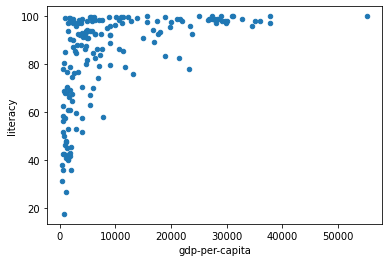

In [15]:
#Q8: What is the relationship between GDP per capita and literacy?
gdp_and_literacy_df = qry("""
SELECT "gdp-per-capita", literacy
FROM countries
""")
def format_literacy(s):
    return float(s.replace(",", "."))

gdp_and_literacy_df["literacy"] = gdp_and_literacy_df["literacy"].apply(format_literacy)
gdp_and_literacy_df.plot.scatter(x="gdp-per-capita", y="literacy")

In [16]:
#Q9: What is the correlation between GDP per capita and literacy?
gdp_and_literacy_df.corr()["gdp-per-capita"]["literacy"]

0.5154347345101354

<AxesSubplot:xlabel='gdp-per-capita', ylabel='phones'>

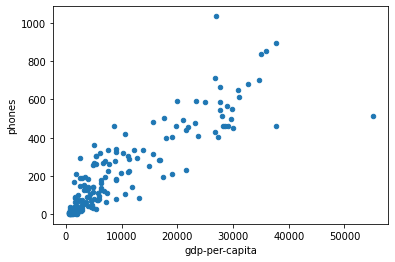

In [17]:
#Q10: What is the relationship between GDP per capita and phones?
gdp_and_phones_df = qry("""
SELECT "gdp-per-capita", phones
FROM countries
""")
def format_phones(s):
    return float(s)

gdp_and_phones_df["phones"] = gdp_and_phones_df["phones"].apply(format_literacy)
gdp_and_phones_df.plot.scatter(x="gdp-per-capita", y="phones")

<AxesSubplot:xlabel='gdp-per-capita', ylabel='infant-mortality'>

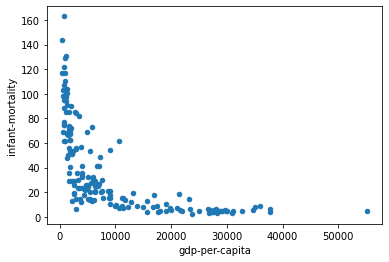

In [18]:
#Q11: What is the relationship between GDP per capita and infant-mortality?
gdp_and_infant_mortality_df = qry("""
SELECT "gdp-per-capita", "infant-mortality"
FROM countries
""")
gdp_and_infant_mortality_df.plot.scatter(x="gdp-per-capita", y="infant-mortality")

<AxesSubplot:xlabel='gdp-per-capita', ylabel='inverse infant-mortality'>

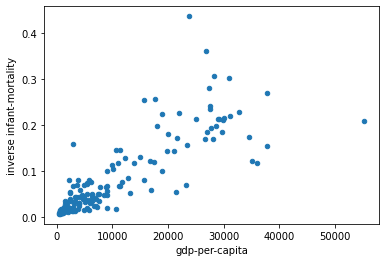

In [19]:
#Q12: What is the relationship between GDP per capita and inverse of infant-mortality?
gdp_and_inv_infant_mortality_df = qry("""
SELECT "gdp-per-capita", 1/"infant-mortality" AS 'inverse infant-mortality'
FROM countries
""")

gdp_and_inv_infant_mortality_df.plot.scatter(x="gdp-per-capita", y="inverse infant-mortality")

In [20]:
#Q13: fit a y = m * x + n line to the scatter plot in question 10 using the least-squares method; what are the coefficients m and n?
import numpy as np

df = gdp_and_phones_df
df["1"] = 1

res = np.linalg.lstsq(df[["gdp-per-capita", "1"]], df["phones"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept
(m, n)

(0.01808887883603978, 37.95908987837674)

In [21]:
#Q14: When gdp-per-capita = 30000, what is the expected value for phones according to the regression model between them?
b = n
x = 30000
y = m * x + b
y

580.6254549595701

<AxesSubplot:xlabel='gdp-per-capita', ylabel='phones'>

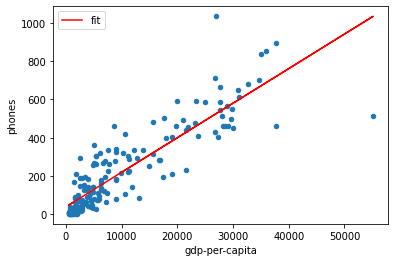

In [22]:
#Q15: plot the regression line to the scatter plot
ax = df.plot.scatter(x='gdp-per-capita', y='phones')
df["fit"] = df["gdp-per-capita"] * m + n
df.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)

In [23]:
#Q16: What are the top 15 countries that have the smallest gap between birth rate and death rate?
gap_countries = qry("""
SELECT country, "birth-rate", "death-rate"
FROM countries
GROUP BY country
ORDER BY "birth-rate" - "death-rate" ASC
""")
gap_countries[:15]

,country,birth-rate,death-rate
0,Botswana,23.08,29.50
1,Ukraine,8.82,14.39
2,Russia,9.95,14.65
3,Bulgaria,9.65,14.27
4,Latvia,9.24,13.66
5,Lesotho,24.75,28.71
6,South Africa,18.20,22.00
7,Monaco,9.19,12.91
8,Hungary,9.72,13.11
9,Estonia,10.04,13.25


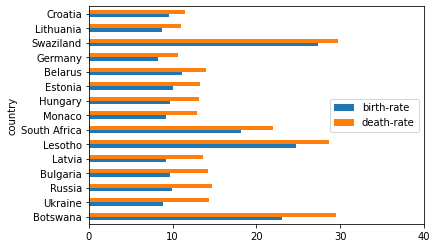

In [24]:
#Q17: What are the top 15 countries that have the smallest gap between birth rate and death rate? (answer with a plot)
gap_countries_plot = gap_countries[:15].plot.barh()
gap_countries_plot.set_ylabel("country")
gap_countries_plot.set_yticklabels(list(gap_countries[:15].country))
gap_countries_plot.set_xticks(np.arange(0, 50, step=10))

<AxesSubplot:xlabel='population', ylabel='gdp-per-capita'>

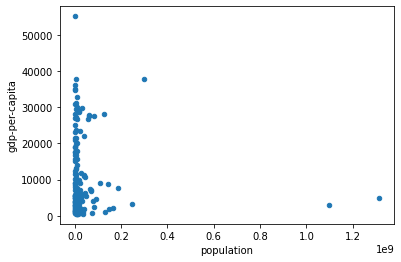

In [25]:
#Q18: What is the relationship between population and gdp-per-capita? (answer with a plot)
pop_and_gdp_df = qry("""
SELECT population, "gdp-per-capita"
FROM countries
""")
pop_and_gdp_df.plot.scatter(x="population", y="gdp-per-capita")

In [26]:
#Q19: Did you notice the four outliers? Which countries are they?
pop_and_gdp_df = qry("""
SELECT country, population, "gdp-per-capita"
FROM countries
WHERE "gdp-per-capita" > 55000 OR population > 2.5e8 
ORDER BY "gdp-per-capita" ASC
""")
pop_and_gdp_df

,country,population,gdp-per-capita
0,India,1095351995,2900
1,China,1313973713,5000
2,United States,298444215,37800
3,Luxembourg,474413,55100


Text(0.5, 1.0, 'GDP Breakdown')

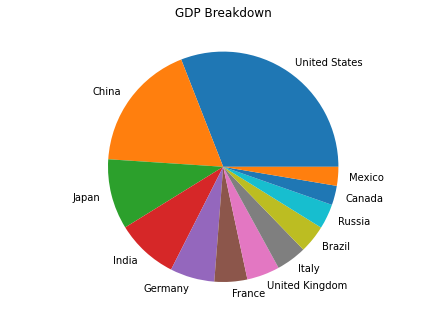

In [27]:
#Q20: what are the top 12 countries that have the largest real GDP? (answer with a plot)
fig = plt.figure()
largest_real_gdp_pie = fig.add_axes([0,0,1,1])
largest_real_gdp_pie.axis('equal')
country_names = top_real_gdb.country
real_gdp = top_real_gdb["Real GDP(billion)"]
largest_real_gdp_pie.pie(real_gdp, labels = country_names)
largest_real_gdp_pie.set_title("GDP Breakdown")